<a href="https://colab.research.google.com/github/hemz990/fyp/blob/main/Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle/"

In [ ]:
cp /content/drive/MyDrive/fyp_new/sc /content/

cp: -r not specified; omitting directory '/content/drive/MyDrive/fyp_new/sc'


In [ ]:
import numpy as np
import cv2
import glob
import tensorflow as tf
from tensorflow.keras import Model, Input, regularizers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D, Add, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from multiprocessing import Pool
import pickle
import glob
import shutil
import os
from tqdm import tqdm

In [ ]:
face_images = sorted(glob.glob('/content/drive/MyDrive/fyp_new/sc/*.jpg'))
print(len(face_images))


def read(path):
  img = load_img(path, target_size=(128,128,3))
  img = img_to_array(img)
  img = img/255.
  return img
p= Pool(10)
img_sc = p.map(read, face_images)

700


In [ ]:
face_images = sorted(glob.glob('/content/drive/MyDrive/fyp_new/nosc/*.jpg'))
print(len(face_images))


def read(path):
  img = load_img(path, target_size=(128,128,3))
  img = img_to_array(img)
  img = img/255.
  # progress.update(1)
  return img
p= Pool(10)
img_nosc = p.map(read, face_images)

700


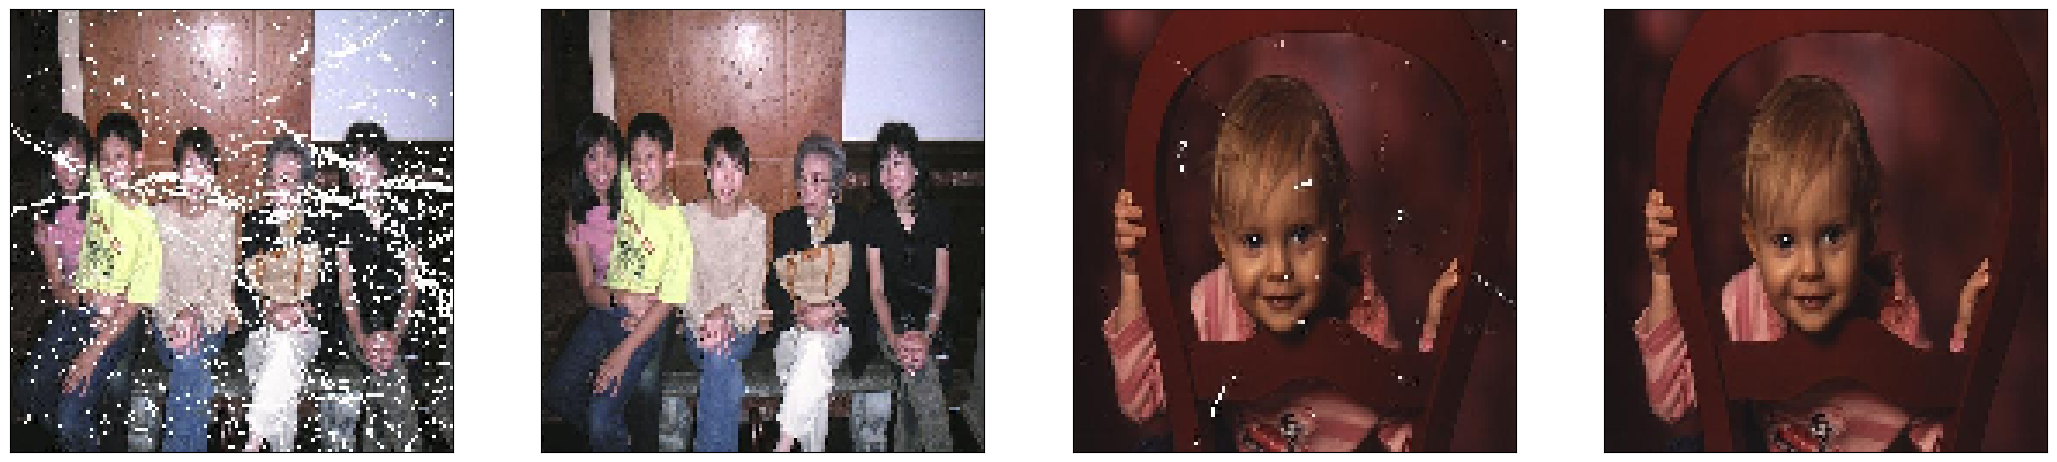

In [ ]:
plt.figure(figsize= (40,40))
ax = plt.subplot(4, 6 , 1)
plt.imshow(img_sc[225])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax = plt.subplot(4, 6, 2)
plt.imshow(img_nosc[225])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax = plt.subplot(4, 6, 3)
plt.imshow(img_sc[347])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax = plt.subplot(4, 6, 4)
plt.imshow(img_nosc[347])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
print(img_nosc[0].shape)

(128, 128, 3)


In [ ]:
with open('img_nosc.pickle','wb') as f:
  pickle.dump(img_nosc, f)
  print(len(img_nosc))

In [ ]:
with open('/content/drive/MyDrive/fyp_new/img_sc.pickle','rb') as f:
  img_sc = pickle.load(f)

with open('/content/drive/MyDrive/fyp_new/img_nosc.pickle','rb') as f:
  img_nosc = pickle.load(f)

In [ ]:
cp /content/img_nosc.pickle /content/drive/MyDrive/fyp_new

In [ ]:
cp /content/drive/MyDrive/fyp_new/img_nosc.pickle /content/

In [ ]:
img_sc = np.array(img_sc)
img_nosc = np.array(img_nosc)

In [ ]:
all_images = np.array(img_sc)
train_px, val_px = train_test_split(all_images, random_state = 32, test_size=0.2)

In [ ]:
all_images = np.array(img_nosc)
train_x, val_x = train_test_split(all_images, random_state = 32, test_size=0.2)

In [ ]:
Input_img = Input(shape=(128,128, 3))

#encoding architecture
x1 = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-11))(Input_img)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-11))(x1)
x4 = Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-11))(x2)
xx = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-11))(x4)
x6 = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-11))(Input_img)
x7 = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-11))(x6)
x8 = MaxPool2D(padding='same')(x7)
x9 = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-11))(x8)
xy = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-11))(x9)
encodedx = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-11))(xx)
encodedy = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-11))(xy)

# decoding architecture
x10 = UpSampling2D()(encodedy)
x11 = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-11))(x10)
x12 = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-11))(x11)
x13 = MaxPool2D(padding='same')(x12)
x14 = Add()([xy, x13])
x15 = UpSampling2D()(x14)
x16 = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-11))(x15)
x17 = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-11))(x16)
x18 = Add()([x7,x17])
yy = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-11))(x18)
x19 = MaxPool2D(padding='same')(encodedx)
x20 = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-11))(x19)
x21 = Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-11))(x20)
x22 = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-11))(x21)
x23 = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-11))(x22)
x23 = UpSampling2D()(x23)
x24 = Add()([xx, x23])
yx = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-11))(x24)
x = Conv2D(3, (3, 3), padding='same',activation='relu', kernel_regularizer=regularizers.l1(10e-11))(yy)
y = Conv2D(3, (3, 3), padding='same',activation='relu', kernel_regularizer=regularizers.l1(10e-11))(yx)
decoded = Add()([x,y])
autoencoder = Model(Input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [ ]:
autoencoder.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 128, 128, 12  3584        ['input_1[0][0]']                
                                8)                                                                
                                                                                                  
 conv2d_5 (Conv2D)              (None, 128, 128, 64  73792       ['conv2d_4[0][0]']               
                                )                                                             

In [ ]:
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=50, verbose=1, mode='min')
model_checkpoint =  ModelCheckpoint('scratch_rem.h5', save_best_only = True)

history = autoencoder.fit(train_px,train_x,
            epochs=150,
            validation_data=(val_px, val_x),
            callbacks=[early_stopper, model_checkpoint], batch_size=10)

Epoch 1/150
56/56 [==============================] - 45s 250ms/step - loss: 0.0249 - accuracy: 0.5796 - val_loss: 0.0102 - val_accuracy: 0.7045
Epoch 2/150
56/56 [==============================] - 13s 241ms/step - loss: 0.0075 - accuracy: 0.7356 - val_loss: 0.0072 - val_accuracy: 0.8102
Epoch 3/150
56/56 [==============================] - 14s 242ms/step - loss: 0.0062 - accuracy: 0.7840 - val_loss: 0.0063 - val_accuracy: 0.8207
Epoch 4/150
56/56 [==============================] - 14s 242ms/step - loss: 0.0056 - accuracy: 0.8228 - val_loss: 0.0063 - val_accuracy: 0.8371
Epoch 5/150
56/56 [==============================] - 14s 246ms/step - loss: 0.0055 - accuracy: 0.8222 - val_loss: 0.0062 - val_accuracy: 0.8466
Epoch 6/150
56/56 [==============================] - 13s 240ms/step - loss: 0.0059 - accuracy: 0.8053 - val_loss: 0.0065 - val_accuracy: 0.7540
Epoch 7/150
56/56 [==============================] - 14s 243ms/step - loss: 0.0055 - accuracy: 0.8141 - val_loss: 0.0062 - val_accuracy:

In [ ]:
cp /content/drive/MyDrive/personal/scratch_rem.h5 /content

In [ ]:
cp /content/scratch_rem.h5 /content/drive/MyDrive/personal/

22/22 [==============================] - 4s 188ms/step


ValueError: ignored

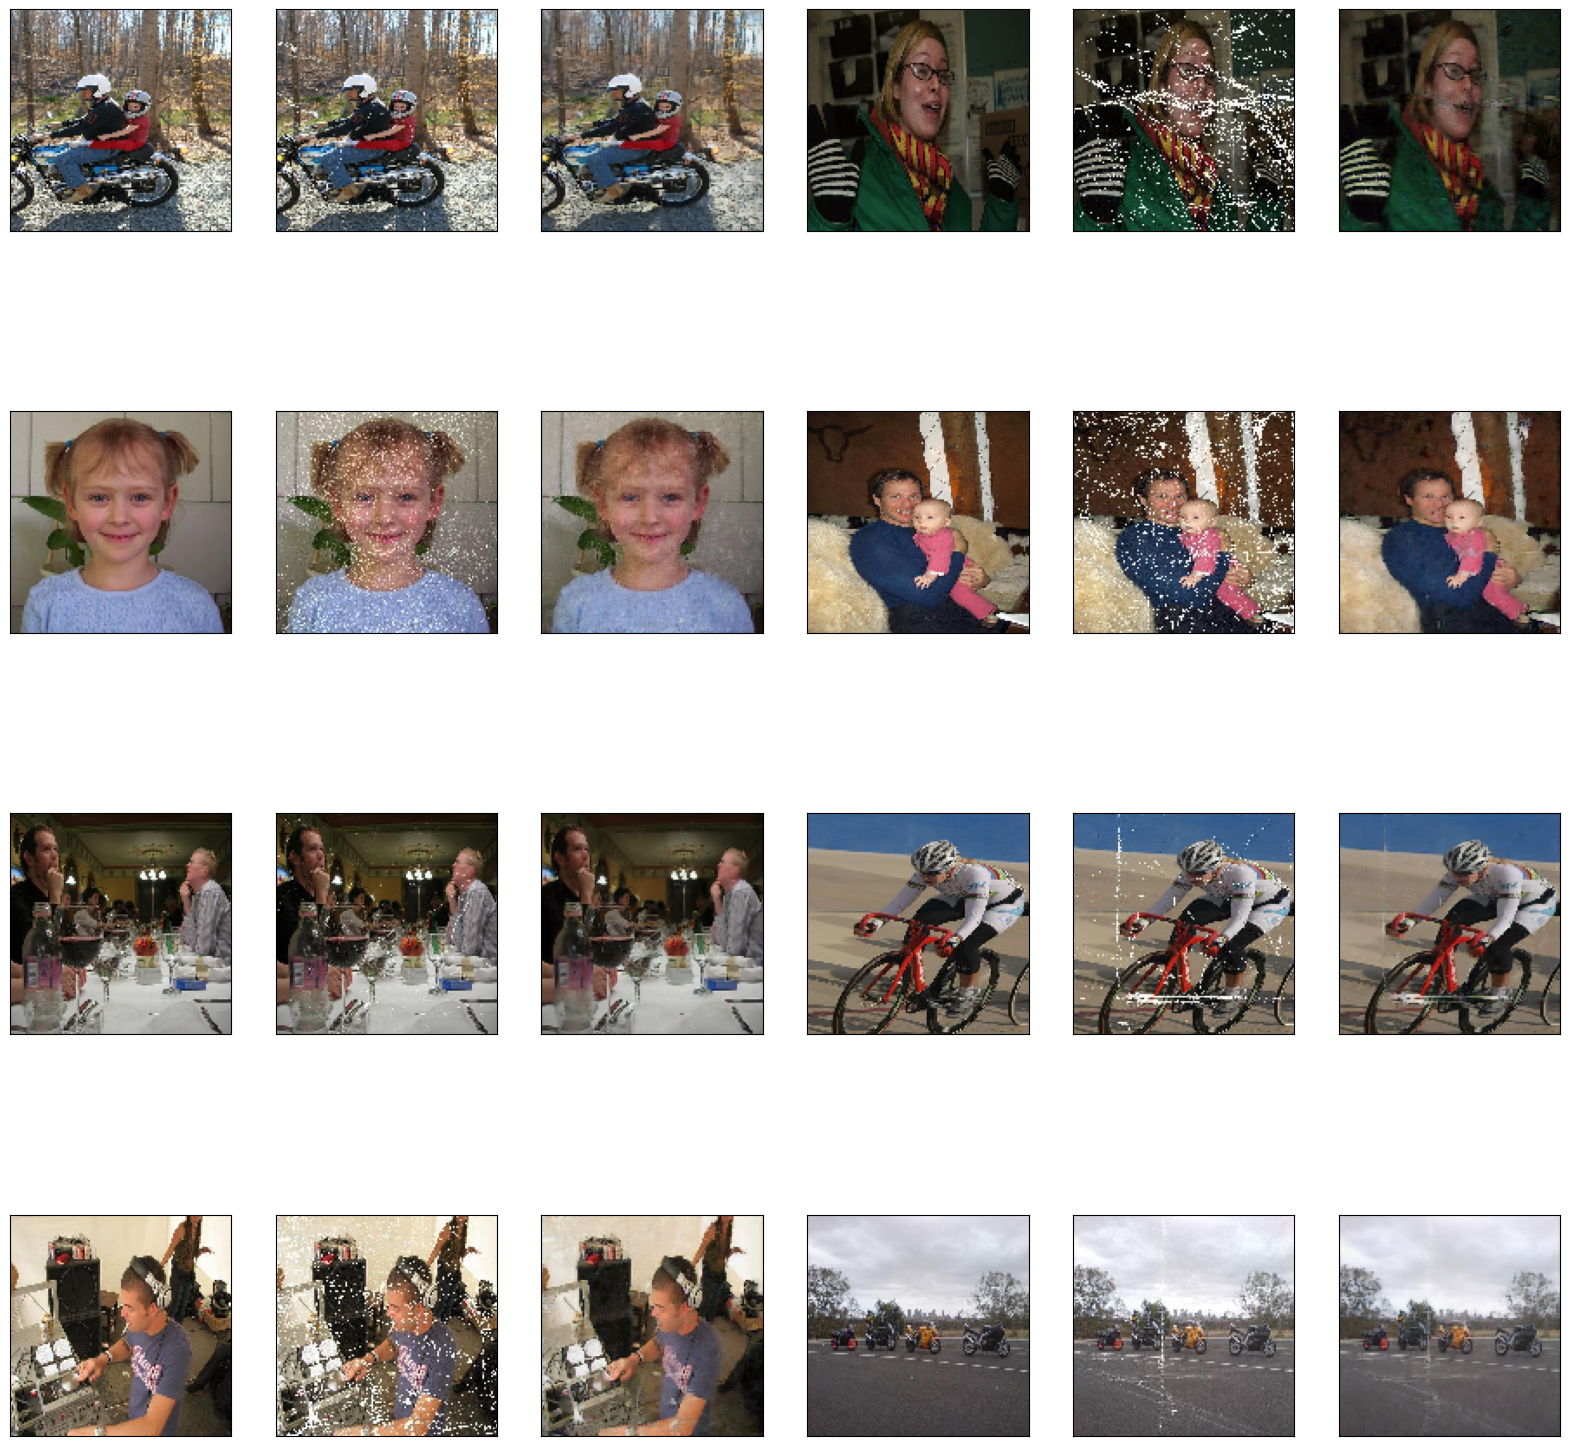

In [ ]:
x = load_model("scratch_rem.h5")
pred2 = x.predict(img_sc)
n = 10
j=0
plt.figure(figsize= (20,20))
for i in range(n):
  j +=1
  ax = plt.subplot(4, 6 , j)
  plt.imshow(img_nosc[i+96])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  j +=1
  ax = plt.subplot(4, 6, j)
  plt.imshow(img_sc[i+96])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  j +=1
  ax = plt.subplot(4, 6, j)
  plt.imshow(pred2[i+96])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  print()
plt.show()

In [ ]:
results = x.evaluate(val_px, val_x)
print('val_loss, val_accuracy', results)

5/5 [==============================] - 1s 164ms/step - loss: 0.0043 - accuracy: 0.8304
val_loss, val_accuracy [0.004287524614483118, 0.8303540945053101]


In [ ]:
results = autoencoder.evaluate(val_px, val_x)
print('val_loss, val_accuracy', results)

5/5 [==============================] - 1s 166ms/step - loss: 0.0045 - accuracy: 0.8479
val_loss, val_accuracy [0.004458711016923189, 0.8479278683662415]


In [ ]:
x = load_model("scratch_rem.h5")

In [ ]:
final = x.predict(train_px)

18/18 [==============================] - 18s 332ms/step


In [ ]:
from skimage import metrics

mse_skimg = 0
psnr_skimg = 0
rmse_skimg = 0

for i in range(len(final)):
    mse_skimg = mse_skimg + metrics.mean_squared_error(final[i], train_x[i])
    psnr_skimg = psnr_skimg + metrics.peak_signal_noise_ratio(final[i], train_x[i], data_range=len(final))
    rmse_skimg = rmse_skimg + metrics.normalized_root_mse(final[i], train_x[i])

mse_avg = mse_skimg/len(final)
psnr_avg = psnr_skimg/len(final)
rmse_avg = rmse_skimg/len(final)

print("MSE: Average = ", mse_avg)
print("PSNR: Average = ", psnr_avg)
print("RMSE: Average = ", rmse_avg)

MSE: Average =  0.003592418881090381
PSNR: Average =  80.69585547983678
RMSE: Average =  0.1204029660336788
